In [1]:
import vaex
import numpy as np
from matplotlib import pyplot as plt
from os.path import join, abspath
from os import pardir
from scipy import interpolate
from glob import glob
import sys
from hammer import vertical
from tqdm import tqdm
from scipy.stats import norm, poisson
from scipy.integrate import simps

In [2]:
root_dir = abspath(join(".."))
root_dir

'/home2/s20321005/Thesis-Project'

In [3]:
if root_dir not in sys.path:
    sys.path.append(root_dir)
sys.path

['/home2/s20321005/Thesis-Project/4_Vertical_Number',
 '/home2/s20321005/.conda/envs/vaex/lib/python38.zip',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/lib-dynload',
 '',
 '/home2/s20321005/.local/lib/python3.8/site-packages',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages',
 '/home2/s20321005/Thesis-Project']

In [4]:
from utils import safe_mkdir, style, load_spectral_types

style()

In [5]:
root_data_dir = abspath(join(root_dir, "Data"))
spectral_dir = join(root_data_dir, "Color")
comp_dir = join(root_data_dir, "Effective-Volume")

In [6]:
data_dir = join(root_data_dir, "Vertical-Number")
safe_mkdir(data_dir)

Directory /home2/s20321005/Thesis-Project/Data/Vertical-Number already exist. Good to go!


In [7]:
index = 0
comp_files = glob(join(comp_dir, "*.hdf5"))
comp_files.sort()

df_comp = vaex.open(comp_files[index])
df_comp

#,z,frac
0,-299.3987975951904,0.762557053508022
1,-298.19639278557116,0.762278457972018
2,-296.9939879759519,0.761999059884145
3,-295.79158316633266,0.7617188543215139
4,-294.58917835671343,0.7614378361059956
...,...,...
494,294.5891783567135,0.7614378361059956
495,295.7915831663327,0.7617188543215139
496,296.99398797595194,0.761999059884145
497,298.19639278557116,0.762278457972018


In [8]:
# data_dir = join(root_data_dir, "Vertical-Distance", name)
# safe_mkdir(data_dir)

In [8]:
spec_files = glob(join(spectral_dir, "*.hdf5"))
spec_files.sort()

gaia = vaex.open(spec_files[index])
gaia

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,GLON,GLAT,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,designation,use_src,rd_flg,subclass_lamost,rv,rv_cat,rv_el,rv_eu,rv_sym,teff,teff_cat,teff_el,teff_eu,teff_sym,logg,logg_cat,logg_el,logg_eu,logg_sym,feh,feh_cat,feh_el,feh_eu,feh_sym,mh,mh_cat,mh_el,mh_eu,mh_sym,alphafe,alphafe_cat,alphafe_el,alphafe_eu,alphafe_sym,alpham,alpham_cat,alpham_el,alpham_eu,alpham_sym,JK,M_J,Dist,z,r,pmlon,pmlat,e_pmlon,e_pmlat,e_rv,vb,vphi,e_vb,e_vphi,w,e_w,v_xy,e_v_xy,v,e_v,u,e_u,M_J_lower,M_J_upper
0,0.014884639099905679,-0.6277107372592441,8.755000114440918,8.656999588012695,AAA,2309518882743792512,23.22193717956543,22.29106181287425,0.015476686879992485,6.508986172951364,0.016319049522280693,4.789413549620276,0.020170677453279495,9.131726264953613,9.230249404907227,8.934432983398438,1889.544189453125,2443.355224609375,1.1517304182052612,1.167120337486267,2.951179464847555,-1.3351842543237686,208.5220947265625,204.33360290527344,210.59359741210938,0.003100000089034438,0.0010000000474974513,0.00570000009611249,nan,nan,nan,A,00032467-3557546,1,112,--,13.979635238647461,gaia,0.8730981349945068,0.8730981349945068,1.0,7851.72216796875,gspphot,7.68994140625,6.4814453125,0.0,4.14709997177124,gspphot,0.008999824523925781,0.014599800109863281,0.0,nan,--,nan,nan,nan,-1.2071000337600708,gspphot,0.004799962043762207,0.006800055503845215,0.0,0.12999999523162842,rave,nan,nan,-1.0,nan,--,nan,nan,nan,0.09800056606494414,2.156411807047792,208.79383031755194,-203.02519970723176,48.7404540655227,-8.415224816113692,-21.64352857182297,0.016011703235616633,0.015794447555597668,0.8730981349945068,-21.420227000145907,-8.328402885890153,-0.09155582963669412,-0.038488697266941825,-18.593699921256633,0.8492448485468144,-17.56504054597298,0.22240955574805651,15.671299950086627,0.21851120838760413,11.50231723983446,0.056570682463120345,0.9292047712455165,2.2688119225303867
1,0.004024327829370965,-0.524718735926011,8.343000411987305,8.354999542236328,AAA,2320850144638182912,18.953393936157227,18.804502513339813,0.03458862751722336,2.371033566905557,0.02992495708167553,4.294701538457557,0.03351640701293945,8.412426948547363,8.408456802368164,8.392923355102539,1768.0096435546875,2107.264404296875,0.963398277759552,1.1564381122589111,-2.8775599181995015,-1.370726365867913,235.02450561523438,232.80850219726562,238.05279541015625,0.11829999834299088,0.11500000208616257,0.12160000205039978,nan,nan,nan,B,00005533-3003510,1,111,--,1.1950876712799072,gaia,2.3559632301330566,2.3559632301330566,1.0,10387.2470703125,gspphot,32.06640625,29.04296875,0.0,4.2657999992370605,gspphot,0.007599830627441406,0.006599903106689453,0.0,nan,--,nan,nan,nan,-0.723800003528595,gspphot,0.026000022888183594,0.028299987316131592,0.0,nan,--,nan,nan,nan,nan,--,nan,nan,nan,-0.011999120806784336,1.5076653509596054,232.84505129060733,-228.2004156927306,46.27513574470115,-1.504207141911487,-18.893609391109436,0.03013230576967992,0.0344081437870144,2.3559632301330566,-20.852603542276118,-1.6601716763817702,-0.16710865068114122,-0.03569122831444206,-5.315451438905118,2.3092068990693377,-20.199140700387066,0.49603582548242686,19.932411630452375,0.4789364798558288,-3.6688447259730683,0.13395989028038782,0.4443500309446283,1.9154636418233322
2,0.009026668358389472,-0.5355582254185696,8.772000312805176,8.71500015258789,AAA,2314758575341270912,17.977792739868164,17.864330232092666,0.025747472420334816,2.016616365008992,0.025557175278663635,4.128791564649313,0.028444882482290268,8.970077514648438,9.006498336791992,8.880840301513672,1697.627685546875,1618.81640625,1.2997452020645142,1.158286690711975,-2.93590619117844,-1.3724033313064865,240.72329711914062,238.5511016845703,243.18719482421875,0.003000000026077032,0.000699999975040555,0.01049999

In [9]:
spec = load_spectral_types()
bound = np.load(join(root_data_dir, "boundaries.npy"))
bound

array([[-0.019     ,  0.12400287],
       [ 0.12400287,  0.18800095],
       [ 0.18800095,  0.21900118],
       [ 0.21900118,  0.24100237],
       [ 0.24100237,  0.25900047],
       [ 0.25900047,  0.27500098],
       [ 0.27500098,  0.28800311],
       [ 0.28800311,  0.30000054],
       [ 0.30000054,  0.3120019 ],
       [ 0.3120019 ,  0.32300249],
       [ 0.32300249,  0.33300231],
       [ 0.33300231,  0.34300214],
       [ 0.34300214,  0.35300196],
       [ 0.35300196,  0.36200101],
       [ 0.36200101,  0.376     ]])

In [10]:
sclass = spec["SpT"].to_numpy()
jk_class = spec["J-K"].to_numpy()
jk_class, sclass

(array([-0.235, -0.23 , -0.226, -0.216, -0.207, -0.179, -0.145, -0.131,
        -0.119, -0.108, -0.094, -0.088, -0.081, -0.064, -0.034, -0.023,
        -0.004,  0.005,  0.022,  0.038,  0.059,  0.069,  0.082,  0.095,
         0.112,  0.13 ,  0.141,  0.164,  0.19 ,  0.199,  0.211,  0.227,
         0.256,  0.273,  0.286,  0.299,  0.314,  0.329,  0.349,  0.366,
         0.373,  0.379,  0.386,  0.403,  0.407,  0.424,  0.451,  0.478,
         0.498,  0.525,  0.596,  0.662,  0.7  ,  0.749,  0.783,  0.797,
         0.811,  0.817,  0.828,  0.836,  0.835,  0.834,  0.833,  0.831,
         0.827,  0.837,  0.865,  0.892,  0.917,  0.957,  0.969,  1.003,
         1.072,  1.127,  1.155,  1.19 ,  1.245,  1.27 ,  1.36 ,  1.47 ,
         1.58 ,  1.63 ,  1.668,  1.714,  1.775,  1.785,  1.77 ,  1.56 ,
         1.47 ,  1.13 ,  0.76 ,  0.16 ,  0.14 ,  0.12 ,  0.1  ,  0.07 ,
         0.   ,  0.15 ,  0.15 , -0.1  ]),
 array(['O9V', 'O9.5V', 'B0V', 'B0.5V', 'B1V', 'B1.5V', 'B2V', 'B2.5V',
        'B3V', 'B4V', 

In [11]:
rest = ['L0V', 'L1V', 'L2V', 'L3V', 'L4V', 'L5V', 'L6V', 'L7V', 'L8V', 'L9V',
        'T0V', 'T1V', 'T2V', 'T3V', 'T4V', 'T4.5V', 'T5V', 'T5.5V', 'T6V',
        'T7V', 'T7.5V', 'T8V', 'T9V']
# rest

In [12]:
for file, jb in zip(spec_files, bound):
    name = file.split("/")[-1]
    u = vaex.open(file)
    u_200 = u.filter("abs(z) < 200")
    mask1 = (jk_class < jb[1])
    mask2 = (jk_class > jb[0])
    cl1 = sclass[mask1]
    # if cl1 in rest, remove it
    cl1 = np.array(list(filter(lambda x: x not in rest, cl1)))
    cl2 = sclass[mask2]
    print(jb, len(u), len(u_200), cl2[0], cl1[-1])
    # break

[-0.019       0.12400287] 2564 2422 A0V A8V
[0.12400287 0.18800095] 2953 2719 A9V F1V
[0.18800095 0.21900118] 3216 2867 F2V F4V
[0.21900118 0.24100237] 3378 2919 F5V F5V
[0.24100237 0.25900047] 3605 2970 F6V F6V
[0.25900047 0.27500098] 4053 3291 F7V F7V
[0.27500098 0.28800311] 4011 3165 F8V F8V
[0.28800311 0.30000054] 4287 3315 F9V F9V
[0.30000054 0.3120019 ] 4654 3523 F9.5V F9V
[0.3120019  0.32300249] 4708 3546 F9.5V F9.5V
[0.32300249 0.33300231] 4547 3493 G0V G0V
[0.33300231 0.34300214] 4751 3580 G1V G0V
[0.34300214 0.35300196] 4987 3803 G1V G1V
[0.35300196 0.36200101] 4678 3517 G2V G1V
[0.36200101 0.376     ] 7234 5460 G2V G3V


# Constant Volume Prior

Assume the parallax has normal distribution with mean $\mu_\varpi$ and standard deviation $\sigma_\varpi$.
\begin{align*}
 p(\varpi|\mu_\varpi, \sigma_\varpi) = \frac{1}{\sqrt{2\pi}\sigma_\varpi} \exp\left(-\frac{(\varpi-\mu_\varpi)^2}{2\sigma_\varpi^2}\right)
\end{align*}

And $\mu_\varpi$ is the true parallax. We have relation between distance and parallax, $\varpi = 1/r$.

\begin{align*}
 p(\varpi|r, \sigma_\varpi) = \frac{1}{\sqrt{2\pi}\sigma_\varpi} \exp\left(-\frac{(\varpi-1/r)^2}{2\sigma_\varpi^2}\right)
\end{align*}

We want to infer the real parallax or the real distance, so using Bayes' theorem, we have
\begin{align*}
    p(r|\varpi, \sigma_\varpi) = \frac{p(\varpi|r, \sigma_\varpi) p(r)}{p(\varpi)}
\end{align*}

With constant volume prior, $p(r) \propto r^2$, so
\begin{align*}
    p_u(r|\varpi, \sigma_\varpi) \propto \frac{r^2}{\sigma_\varpi} \exp\left(-\frac{(\varpi-1/r)^2}{2\sigma_\varpi^2}\right)
\end{align*}

Given the star galactic latitude $b$, the distance $r$ is related to the height $z$ by
\begin{align*}
    r = \frac{z}{\sin b}
\end{align*}

so

\begin{align*}
    p(z|\varpi, \sigma_\varpi) |\textup{d}z| &= p(r|\varpi, \sigma_\varpi) |\textup{d}r| \\
    &= p(r|\varpi, \sigma_\varpi) \left|\frac{\textup{d}r}{\textup{d}z}\right| \\
    &= p(r|\varpi, \sigma_\varpi) \frac{1}{\sin b} \\
    &\propto z^2 \exp\left(-\frac{(\varpi-\sin b/z)^2}{2\sigma_\varpi^2}\right)
\end{align*}

<ipython-input-13-eb8c6d8b0c46>:7: RuntimeWarning: divide by zero encountered in divide
  pdf = z**2 * np.exp(-(parallax-np.sin(b)/z)**2/(2*e_parallax**2))


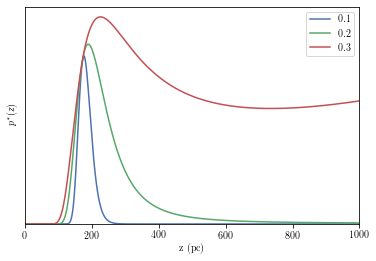

In [13]:
b = 60 * np.pi/180
parallax = 0.005

z = np.linspace(0, 1000, 1000)
for f in [0.1, 0.2, 0.3]:
    e_parallax = f * parallax
    pdf = z**2 * np.exp(-(parallax-np.sin(b)/z)**2/(2*e_parallax**2))
    plt.plot(z, pdf, label=f"{f}")
plt.xlabel("z (pc)")
plt.ylabel(r"$p^{*}(z)$")
plt.xlim(0, 1000)
plt.ylim(0)
plt.yticks([])
plt.legend()
# plt.savefig(join("..", "img", "z-distribution.pdf"))
plt.show()

In [19]:
gaia = gaia[['parallax', 'e_parallax', 'GLAT']] 
gaia = gaia.dropna()
p = gaia['parallax'].to_numpy()/1000
p_err = gaia['e_parallax'].to_numpy()/1000
b = gaia['GLAT'].to_numpy() 
n = 100_000
z_arr = vertical.generate_z(p, p_err, b, n=n)
print("halo", z_arr.shape)

halo (100000, 2564)


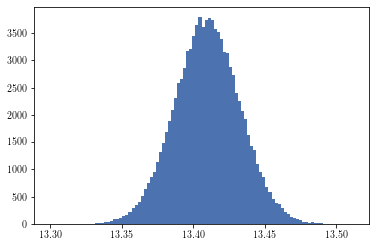

In [20]:
plt.hist(z_arr[:, 10], bins=100);

# Load the z distances

In [10]:
# files = glob(join(data_dir, "*.npy"))
# files.sort()
# files

['/home2/s20321005/Thesis-Project/Data/Vertical-Distance/no/gaia_(-0.10)_(0.13).npy']

(0.0, 1.0)

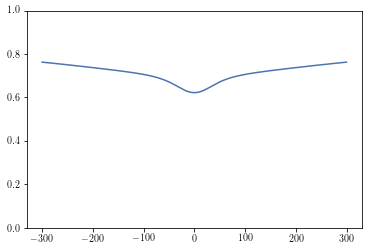

In [21]:
z = df_comp['z'].to_numpy()
frac = df_comp['frac'].to_numpy()
compz = interpolate.interp1d(z, frac, fill_value='extrapolate', bounds_error=False, kind="cubic")

plt.plot(z, frac)
plt.ylim(0,1)

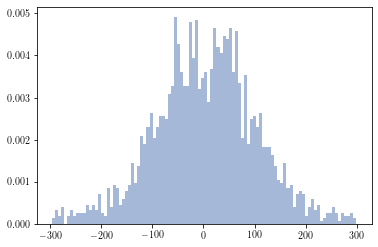

In [22]:
plt.hist(z_arr[1800], bins=100, density=True, alpha=0.5);

In [23]:
# zb = np.max(z)
zb = 300.0
zmax = np.minimum(np.max(z_arr), zb)
zmin = np.maximum(np.min(z_arr), -zb)
zmax, zmin

(300.0, -300.0)

In [24]:
zl = np.floor(np.maximum(zmin, -zb))
zu = np.ceil(np.minimum(zmax, zb))
zedge = np.linspace(zl, zu, 20)

gaia = vaex.open(spec_files[index])
zs = gaia['z'].to_numpy()
znum, _ = np.histogram(zs, bins=zedge)
zmid = (zedge[1:] + zedge[:-1])/2
comp = compz(zmid)
mask = (comp > 0)*(znum > 0)
znum = znum[mask]
zmid = zmid[mask]
zerr = np.sqrt(znum)

M = z_arr.shape[0]
znum_est = np.empty((M, len(znum)), dtype=int)
for i in tqdm(range(M)):
    z_realization = z_arr[i]
    znum_est_i = np.histogram(z_realization, bins=zedge)[0]
    znum_est[i] = znum_est_i[mask]

  1%|          | 597/100000 [00:00<00:16, 5959.02it/s]

100%|██████████| 100000/100000 [00:16<00:00, 6233.48it/s]


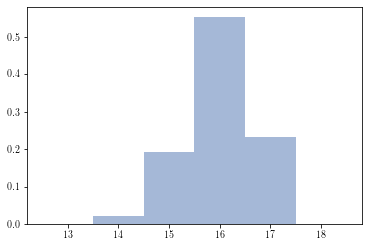

[13. 14. 15. 16. 17. 18.] [4.5000e-04 2.0010e-02 1.9278e-01 5.5366e-01 2.3294e-01 1.6000e-04]


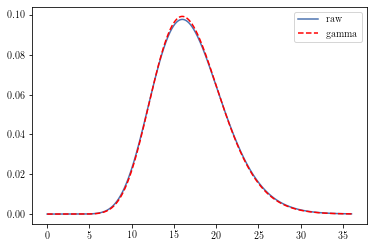

comp 0.7589820661975545
[15.98943]


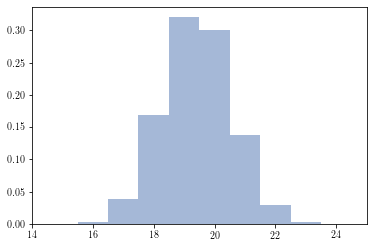

[15. 16. 17. 18. 19. 20. 21. 22. 23. 24.] [5.0000e-05 2.6200e-03 3.8350e-02 1.6848e-01 3.2073e-01 3.0037e-01
 1.3834e-01 2.8730e-02 2.3100e-03 2.0000e-05]


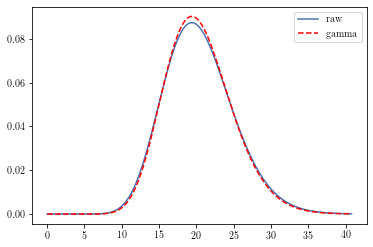

comp 0.7512051135896273
[19.39497434]


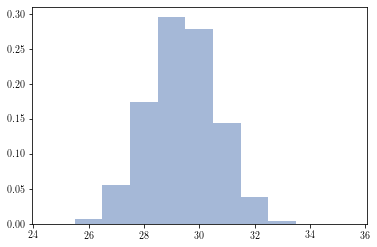

[25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.] [2.2000e-04 7.7700e-03 5.5480e-02 1.7389e-01 2.9598e-01 2.7835e-01
 1.4466e-01 3.8650e-02 4.7300e-03 2.4000e-04 3.0000e-05]


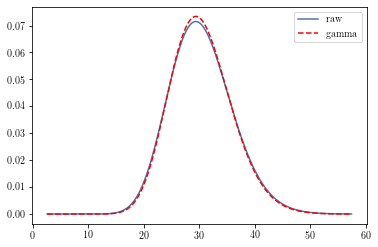

comp 0.7430378807707939
[29.37548126]


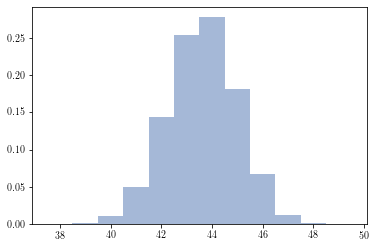

[38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49.] [5.0000e-05 1.2900e-03 1.1170e-02 5.0290e-02 1.4410e-01 2.5330e-01
 2.7834e-01 1.8104e-01 6.6640e-02 1.2630e-02 1.1200e-03 3.0000e-05]


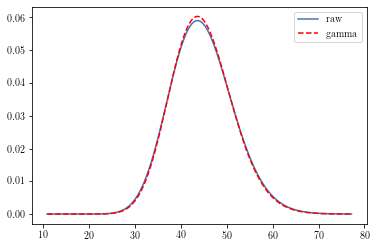

comp 0.7345645636864208
[43.59853524]


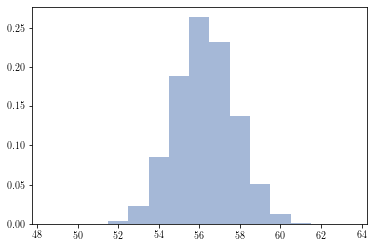

[49. 50. 51. 52. 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63.] [1.0000e-05 3.0000e-05 4.3000e-04 3.3500e-03 2.2840e-02 8.5820e-02
 1.8855e-01 2.6398e-01 2.3191e-01 1.3739e-01 5.0800e-02 1.2850e-02
 1.8200e-03 2.0000e-04 2.0000e-05]


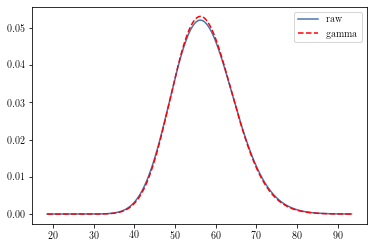

comp 0.7257176875200333
[56.26152386]


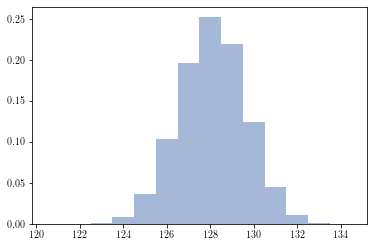

[121. 122. 123. 124. 125. 126. 127. 128. 129. 130. 131. 132. 133. 134.] [2.0000e-05 1.7000e-04 1.5900e-03 8.3300e-03 3.6770e-02 1.0361e-01
 1.9649e-01 2.5220e-01 2.1944e-01 1.2356e-01 4.5270e-02 1.0920e-02
 1.5400e-03 9.0000e-05]


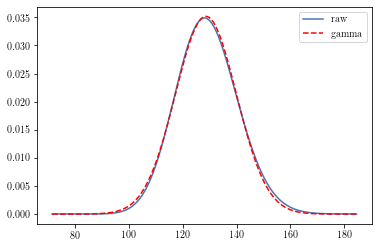

comp 0.7160098394484147
[128.59579721]


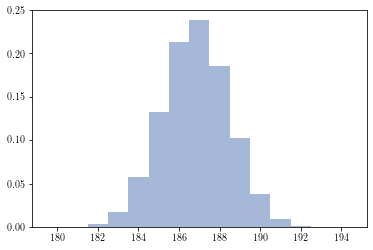

[180. 181. 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193.
 194.] [1.0000e-05 4.0000e-04 3.3500e-03 1.6790e-02 5.7660e-02 1.3275e-01
 2.1302e-01 2.3856e-01 1.8554e-01 1.0218e-01 3.8510e-02 9.3900e-03
 1.6600e-03 1.5000e-04 3.0000e-05]


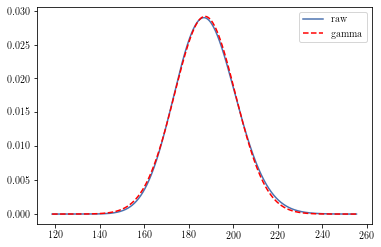

comp 0.7037780246603341
[187.31268123]


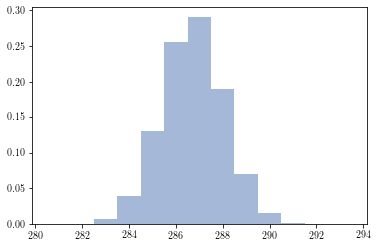

[281. 282. 283. 284. 285. 286. 287. 288. 289. 290. 291. 292. 293.] [5.0000e-05 6.2000e-04 6.3600e-03 3.9020e-02 1.3091e-01 2.5555e-01
 2.9078e-01 1.8898e-01 7.0300e-02 1.5470e-02 1.8700e-03 8.0000e-05
 1.0000e-05]


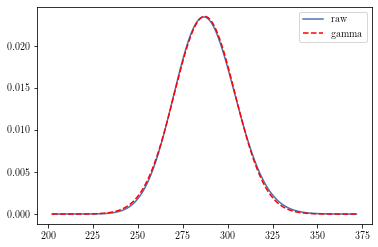

comp 0.6841341560984563
[287.21985149]


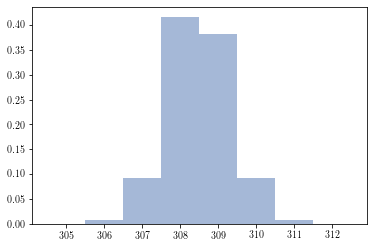

[305. 306. 307. 308. 309. 310. 311. 312.] [2.0000e-04 7.1500e-03 9.3080e-02 4.1645e-01 3.8133e-01 9.2540e-02
 8.9200e-03 3.3000e-04]


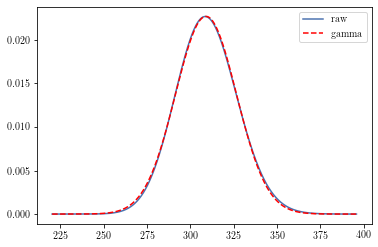

comp 0.6488409890289295
[308.98613774]


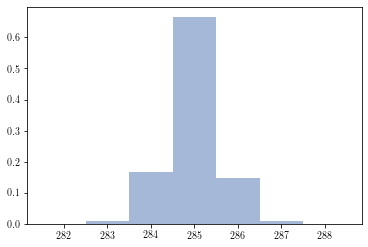

[282. 283. 284. 285. 286. 287. 288.] [2.5000e-04 9.5900e-03 1.6602e-01 6.6571e-01 1.4889e-01 9.4100e-03
 1.3000e-04]


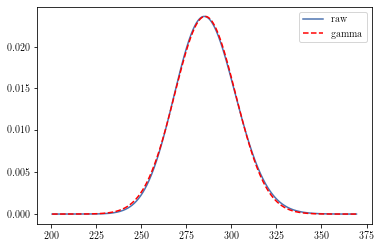

comp 0.6222817097438815
[285.48194081]


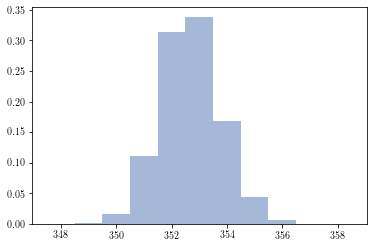

[348. 349. 350. 351. 352. 353. 354. 355. 356. 357. 358.] [4.0000e-05 1.2500e-03 1.6640e-02 1.1093e-01 3.1437e-01 3.3849e-01
 1.6818e-01 4.3940e-02 5.7100e-03 4.3000e-04 2.0000e-05]


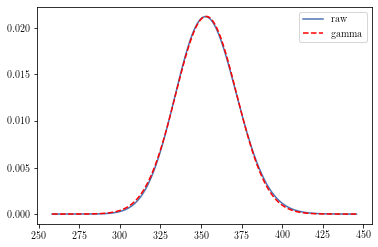

comp 0.6488409890289295
[353.18307743]


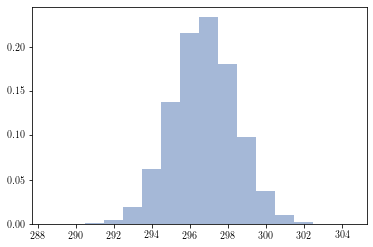

[289. 290. 291. 292. 293. 294. 295. 296. 297. 298. 299. 300. 301. 302.
 303. 304.] [2.0000e-05 3.0000e-05 7.1000e-04 4.3700e-03 1.8940e-02 6.2270e-02
 1.3748e-01 2.1480e-01 2.3351e-01 1.8037e-01 9.8440e-02 3.7370e-02
 9.5600e-03 1.9500e-03 1.7000e-04 1.0000e-05]


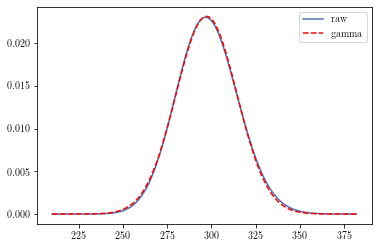

comp 0.6841341560984564
[297.25843076]


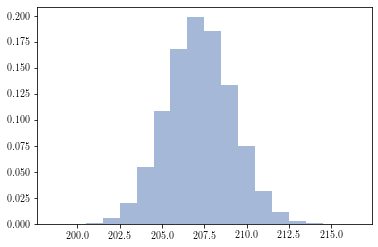

[199. 200. 201. 202. 203. 204. 205. 206. 207. 208. 209. 210. 211. 212.
 213. 214. 215. 216.] [3.0000e-05 1.7000e-04 1.1700e-03 5.7600e-03 2.0610e-02 5.4540e-02
 1.0857e-01 1.6848e-01 1.9920e-01 1.8571e-01 1.3392e-01 7.5020e-02
 3.2050e-02 1.1450e-02 2.7500e-03 4.7000e-04 9.0000e-05 1.0000e-05]


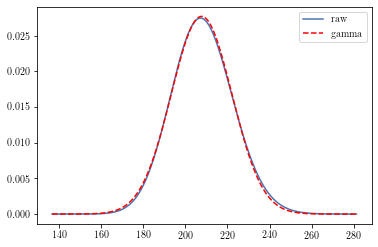

comp 0.703778024660334
[207.71322882]


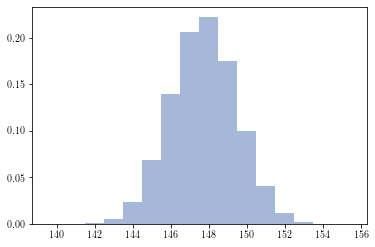

[140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155.] [1.0000e-05 1.3000e-04 1.0200e-03 5.8100e-03 2.3700e-02 6.8940e-02
 1.4027e-01 2.0653e-01 2.2275e-01 1.7492e-01 1.0021e-01 4.0620e-02
 1.2220e-02 2.4800e-03 3.4000e-04 5.0000e-05]


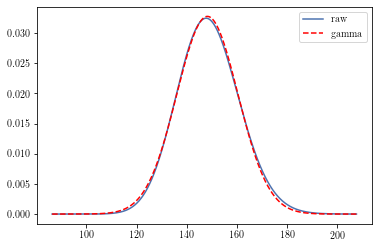

comp 0.7160098394484147
[148.23340077]


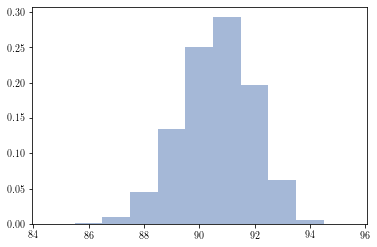

[85. 86. 87. 88. 89. 90. 91. 92. 93. 94. 95.] [1.9000e-04 1.4500e-03 9.7700e-03 4.5160e-02 1.3414e-01 2.5060e-01
 2.9338e-01 1.9644e-01 6.2840e-02 5.7500e-03 2.8000e-04]


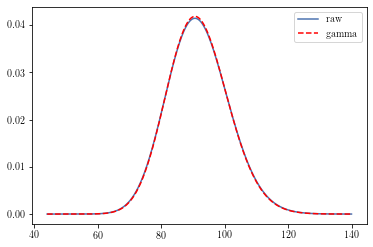

comp 0.7257176875200335
[90.63301715]


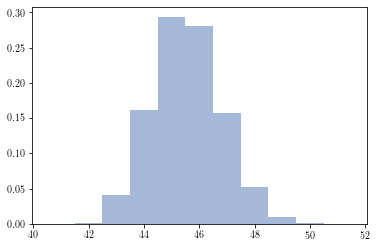

[41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51.] [2.0000e-05 1.6100e-03 4.1650e-02 1.6209e-01 2.9362e-01 2.8079e-01
 1.5730e-01 5.2060e-02 9.7500e-03 1.0500e-03 6.0000e-05]


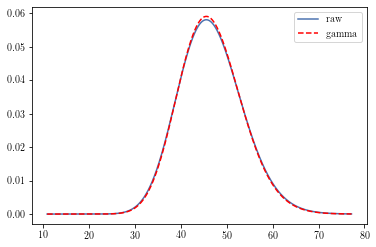

comp 0.7345645636864208
[45.53111925]


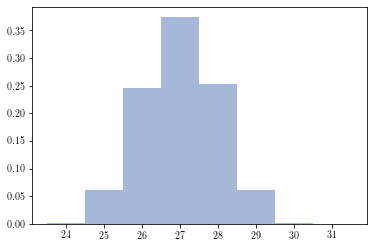

[24. 25. 26. 27. 28. 29. 30. 31.] [1.2000e-03 6.1980e-02 2.4622e-01 3.7445e-01 2.5297e-01 6.2250e-02
 9.1000e-04 2.0000e-05]


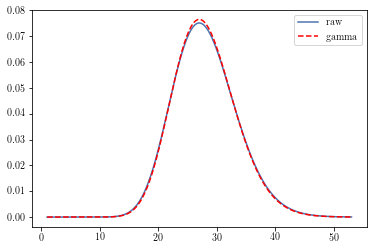

comp 0.743037880770794
[26.99303271]


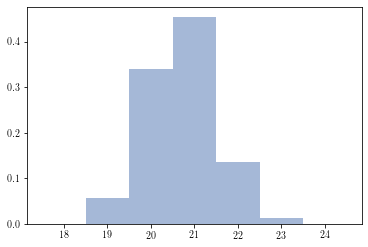

[18. 19. 20. 21. 22. 23. 24.] [2.0000e-05 5.6670e-02 3.3977e-01 4.5441e-01 1.3618e-01 1.2820e-02
 1.3000e-04]


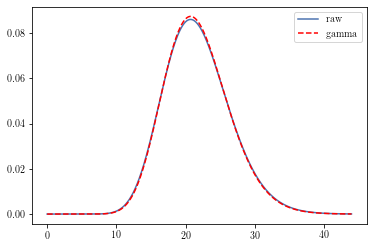

comp 0.7512051135896272
[20.69668297]


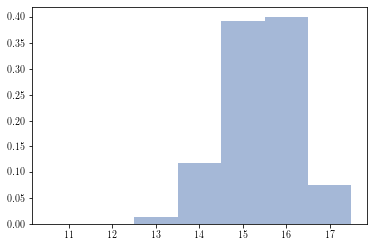

[11. 12. 13. 14. 15. 16. 17.] [1.0000e-05 4.3000e-04 1.3500e-02 1.1728e-01 3.9233e-01 4.0074e-01
 7.5710e-02]


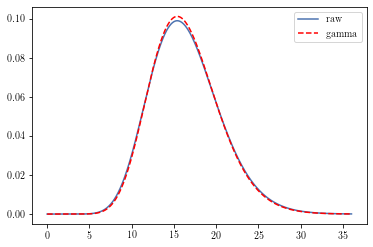

comp 0.7589820661975546
[15.39262672]


In [25]:
from scipy.special import gamma
from scipy.stats import norm
from scipy.optimize import curve_fit

def p_approx(x, n):
    if n > 100:
        return norm.pdf(x, loc=n, scale=np.sqrt(n))
    return np.power(x, n)*np.exp(-x)/gamma(n+1)

z_est = np.empty_like(znum, dtype=float)
z_comp = np.empty_like(znum, dtype=float)
for i in range(len(zmid)):
    # if i < 1:
    #     continue
    nz_min = np.floor(znum_est[:, i].min())
    nz_max = np.ceil(znum_est[:, i].max())
    bins = np.arange(nz_min-1/2, nz_max+1)
    zweight, n_edge = np.histogram(znum_est[:, i], bins=bins, density=True)
    ns = (n_edge[1:] + n_edge[:-1]) / 2
    mask = zweight > 0
    zweight = zweight[mask]
    ns = ns[mask]
    plt.bar(ns, zweight, width=1, alpha=0.5)
    plt.show()
    print(ns, zweight)
    m = 5
    comp = compz(zmid[i])
    lambdas = np.linspace(np.maximum(0, znum[i]-m*np.sqrt(znum[i])), znum[i]+m*np.sqrt(znum[i]), 10_000)
    pn = np.sum(zweight[:, None]*poisson.pmf(ns[:,None], lambdas[None, :]), axis=0)
    area = np.trapz(pn, lambdas)
    pn = pn / area
    popt_g, _ = curve_fit(p_approx, lambdas, pn, p0=[znum[i]])
    plt.plot(lambdas, pn, label='raw')
    plt.plot(lambdas, p_approx(lambdas, *popt_g), label='gamma', ls="--", c='r')
    # plt.plot(lambdas_0, poisson.pmf(znum[i], lambdas_0), 'C1')
    plt.legend()
    plt.show()
    print("comp", comp)
    print(popt_g)
    z_est[i] = popt_g[0]
    z_comp[i] = comp
    # break

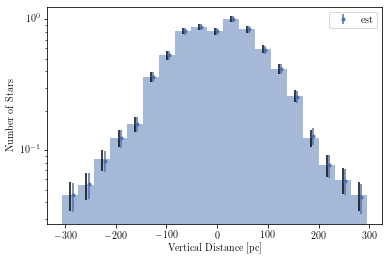

In [26]:
dz = np.min(np.diff(zedge))
plt.bar(zmid-5, znum/znum.max(), yerr=np.sqrt(znum)/znum.max(), width=dz, alpha=0.5)
plt.errorbar(zmid, z_est/z_est.max(), yerr=np.sqrt(z_est)/z_est.max(), fmt='.', label="est")
plt.xlabel("Vertical Distance [pc]")
plt.ylabel("Number of Stars")
plt.legend()
plt.yscale('log')
plt.show()

In [27]:
df = vaex.from_arrays(mid=zmid, num=z_est, com=z_comp)
df

#,mid,num,com
0,-284.2105263157895,15.98942999963268,0.7589820661975545
1,-252.63157894736844,19.394974343028927,0.7512051135896273
2,-221.05263157894737,29.3754812611039,0.7430378807707939
3,-189.4736842105263,43.59853524490723,0.7345645636864208
4,-157.89473684210526,56.26152385749126,0.7257176875200333
...,...,...,...
14,157.89473684210526,90.63301714946122,0.7257176875200335
15,189.4736842105263,45.53111925073981,0.7345645636864208
16,221.05263157894737,26.993032707984,0.743037880770794
17,252.63157894736844,20.69668296527481,0.7512051135896272


In [28]:
name = spec_files[index].split("/")[-1].replace(".npy", ".hdf5").replace("gaia", "z")
name

'z_(-0.019)_(0.124).hdf5'

# with comp and not

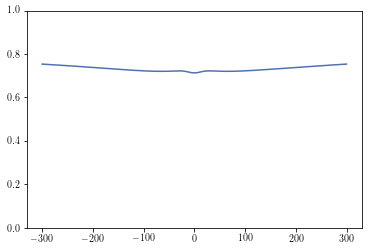

In [29]:
from scipy.interpolate import interp1d
from scipy.special import gamma
from scipy.stats import norm
from scipy.optimize import curve_fit

def p_approx(x, n):
    if n > 100:
        return norm.pdf(x, loc=n, scale=np.sqrt(n))
    return np.power(x, n)*np.exp(-x)/gamma(n+1)

index = 5

gaia = vaex.open(spec_files[index])
gaia = gaia[['parallax', 'e_parallax', 'GLAT']]
gaia = gaia.dropna()
df_comp = vaex.open(comp_files[index])
z = df_comp['z'].to_numpy()
frac = df_comp['frac'].to_numpy()
plt.plot(z, frac)
plt.ylim(0,1)
plt.show()
# continue

In [30]:
p = gaia['parallax'].to_numpy()/1000
p_err = gaia['e_parallax'].to_numpy()/1000
b = gaia['GLAT'].to_numpy()
n = 100_000
z_arr = vertical.generate_z(p, p_err, b, n=n)

compz = interp1d(z, frac, fill_value='extrapolate', bounds_error=False, kind="cubic")
zb = np.max(z)
zmax = np.max(z_arr)
zmin = np.min(z_arr)
zl = np.floor(np.maximum(zmin, -zb))
zu = np.ceil(np.minimum(zmax, zb))
zedge = np.linspace(zl, zu, 30)

gaia = vaex.open(spec_files[index])
zs = gaia['z'].to_numpy()
znum, _ = np.histogram(zs, bins=zedge)
zmid = (zedge[1:] + zedge[:-1])/2
comp = compz(zmid)
mask = (comp > 0)*(znum > 0)
znum = znum[mask]
zmid = zmid[mask]
M = z_arr.shape[0]
znum_est = np.empty((M, len(znum)), dtype=int)
print("generating")
for i in tqdm(range(M)):
    z_realization = z_arr[i]
    znum_est_i = np.histogram(z_realization, bins=zedge)[0]
    znum_est[i] = znum_est_i[mask]
z_est = np.empty_like(znum, dtype=float)
z_comp = np.empty_like(znum, dtype=float)
for i in range(len(zmid)):
    nz_min = np.floor(znum_est[:, i].min())
    nz_max = np.ceil(znum_est[:, i].max())
    bins = np.arange(nz_min-1/2, nz_max+1)
    zweight, n_edge = np.histogram(znum_est[:, i], bins=bins, density=True)
    ns = (n_edge[1:] + n_edge[:-1]) / 2
    mask = zweight > 0
    zweight = zweight[mask]
    ns = ns[mask]
    m = 5
    comp = compz(zmid[i])
    lambdas = np.linspace(np.maximum(0, znum[i]-m*np.sqrt(znum[i])), znum[i]+m*np.sqrt(znum[i]), 10_000)
    pn = np.sum(zweight[:, None]*poisson.pmf(ns[:,None], lambdas[None, :]), axis=0)
    area = np.trapz(pn, lambdas)
    pn = pn / area
    popt_g, _ = curve_fit(p_approx, lambdas, pn, p0=[znum[i]])
    z_est[i] = popt_g[0]
    z_comp[i] = comp

dz = np.min(np.diff(zedge))

generating


100%|██████████| 100000/100000 [00:24<00:00, 4023.84it/s]


In [32]:
spec_files[index]

'/home2/s20321005/Thesis-Project/Data/Color/gaia_(0.259)_(0.275).hdf5'

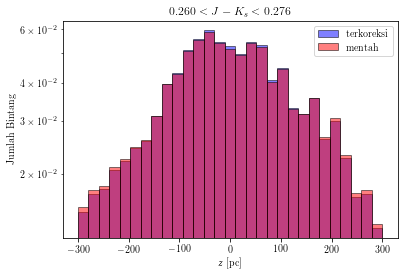

In [33]:

plt.bar(zmid, z_est/z_comp/np.sum(z_est/z_comp), width=dz, alpha=0.5, label="terkoreksi", edgecolor='k', color='b')
plt.bar(zmid, z_est/np.sum(z_est), width=dz, alpha=0.5, label="mentah", edgecolor='k', color='r')
plt.xlabel(r"$z$ [pc]")
plt.ylabel("Jumlah Bintang")
plt.title(r"$0.260 < J-K_s < 0.276$")
plt.legend()
plt.yscale('log')
# plt.savefig(join("..", "img", "nuz-distribution.pdf"))
plt.show()

# all of them

In [34]:
import vaex
import numpy as np
from matplotlib import pyplot as plt
from os.path import join, abspath
from os import pardir
from scipy import interpolate
from glob import glob
import sys
from hammer import vertical
from tqdm import tqdm
from scipy.stats import norm, poisson
from scipy.integrate import simps

In [35]:
root_dir = abspath(join(".."))
root_dir

'/home2/s20321005/Thesis-Project'

In [36]:
if root_dir not in sys.path:
    sys.path.append(root_dir)
sys.path

['/home2/s20321005/Thesis-Project/4_Vertical_Number',
 '/home2/s20321005/.conda/envs/vaex/lib/python38.zip',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/lib-dynload',
 '',
 '/home2/s20321005/.local/lib/python3.8/site-packages',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages',
 '/home2/s20321005/Thesis-Project']

In [37]:
from utils import safe_mkdir, style

style()

In [38]:
root_data_dir = abspath(join(root_dir, "Data"))
spectral_dir = join(root_data_dir, "Color")
comp_dir = join(root_data_dir, "Effective-Volume")

In [39]:
data_dir = join(root_data_dir, "Vertical-Number")
safe_mkdir(data_dir)
# data_dir = join(root_data_dir, "Vertical-Number", "no")
# safe_mkdir(data_dir)

Directory /home2/s20321005/Thesis-Project/Data/Vertical-Number already exist. Good to go!


In [40]:
comp_files = glob(join(comp_dir, "*.hdf5"))
comp_files.sort()

In [41]:
spec_files = glob(join(spectral_dir, "*.hdf5"))
spec_files.sort()

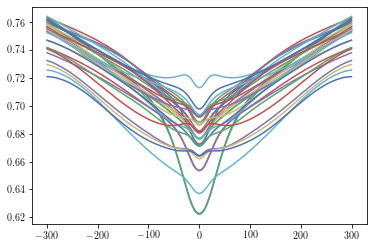

In [42]:
for file in comp_files:
    df_comp = vaex.open(file)
    z = df_comp['z'].to_numpy()
    frac = df_comp['frac'].to_numpy()
    plt.plot(z, frac)

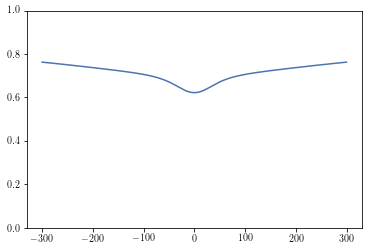

generating


100%|██████████| 100000/100000 [00:16<00:00, 6006.47it/s]


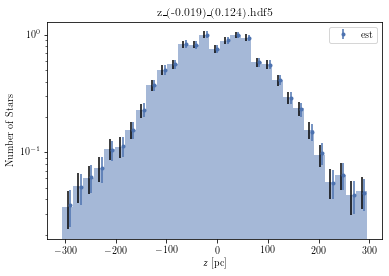

export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 

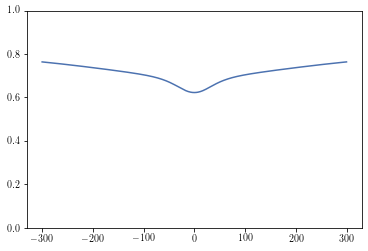

generating


100%|██████████| 100000/100000 [00:18<00:00, 5375.19it/s]


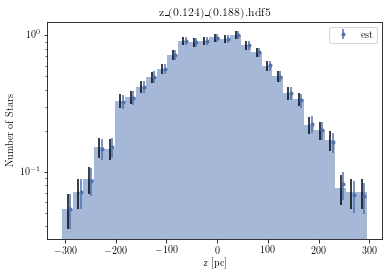

export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 

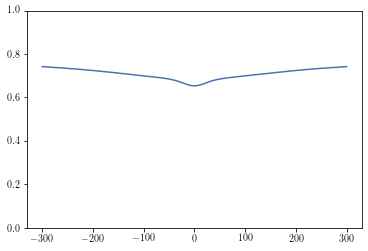

generating


100%|██████████| 100000/100000 [00:20<00:00, 4984.89it/s]


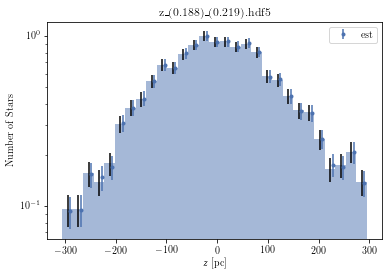

export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 

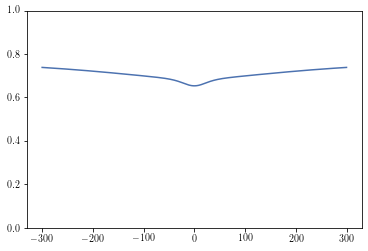

generating


100%|██████████| 100000/100000 [00:21<00:00, 4670.79it/s]


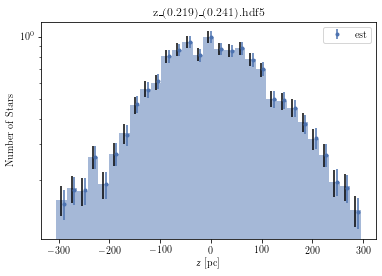

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

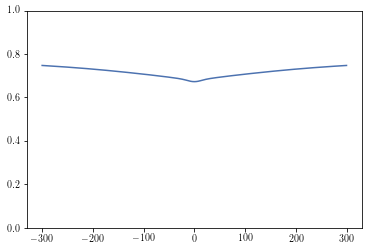

generating


100%|██████████| 100000/100000 [00:22<00:00, 4441.17it/s]


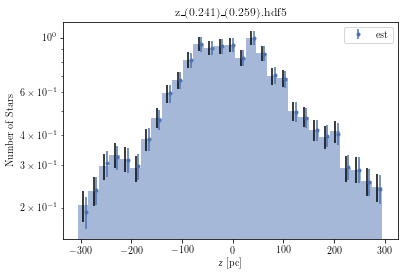

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

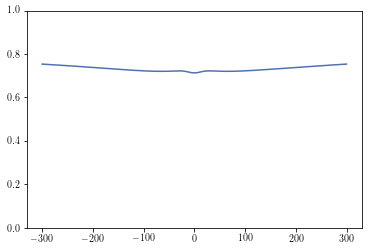

generating


100%|██████████| 100000/100000 [00:25<00:00, 3979.05it/s]


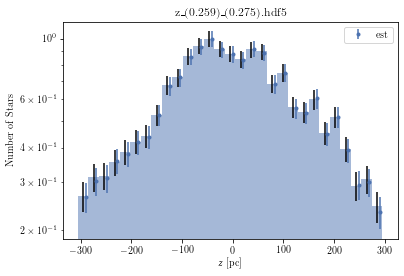

export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 

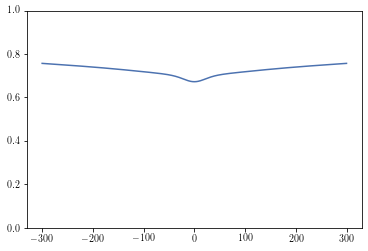

generating


100%|██████████| 100000/100000 [00:24<00:00, 4067.40it/s]


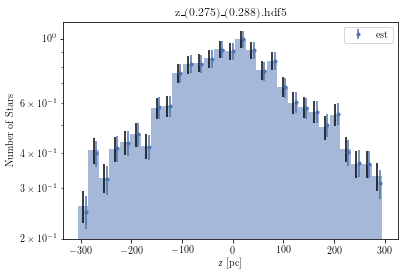

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

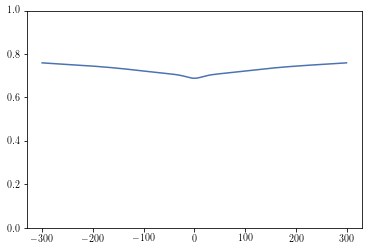

generating


100%|██████████| 100000/100000 [00:25<00:00, 3870.55it/s]


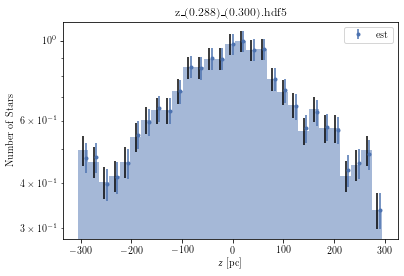

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

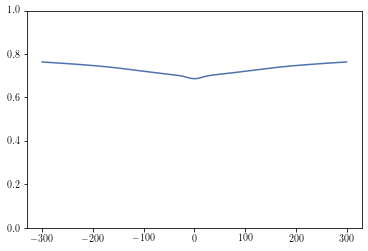

generating


100%|██████████| 100000/100000 [00:28<00:00, 3565.09it/s]


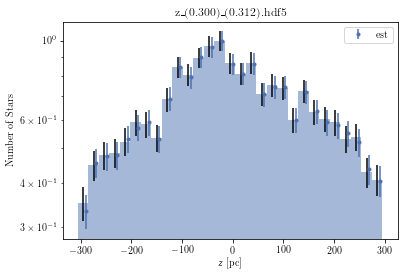

export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
 

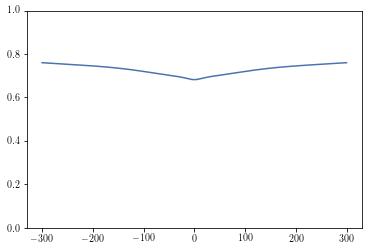

generating


100%|██████████| 100000/100000 [00:28<00:00, 3513.11it/s]


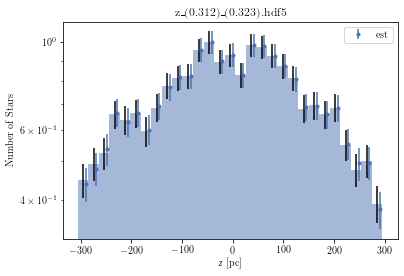

export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 

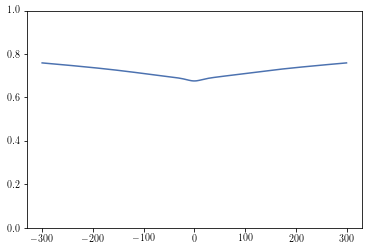

generating


100%|██████████| 100000/100000 [00:27<00:00, 3635.84it/s]


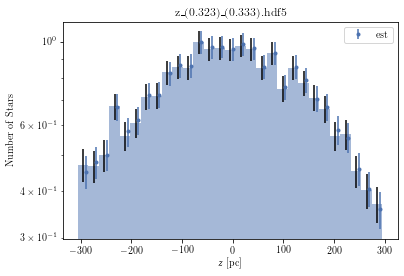

export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 

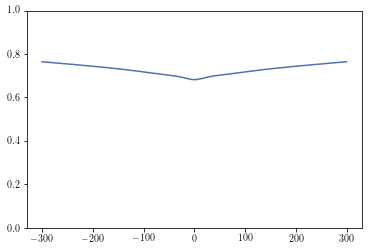

generating


100%|██████████| 100000/100000 [00:28<00:00, 3534.84it/s]


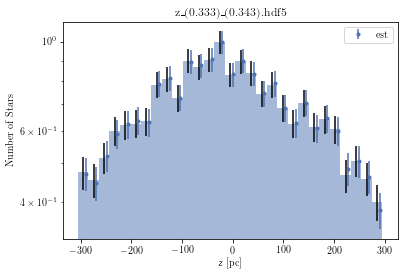

export(hdf5) [########################################] 100.00% elapsed time  :     0.03s =  0.0m =  0.0h
 

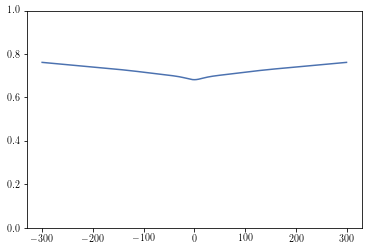

generating


100%|██████████| 100000/100000 [00:30<00:00, 3287.54it/s]


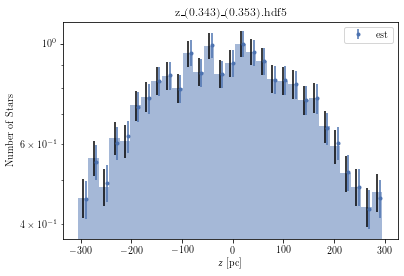

export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 

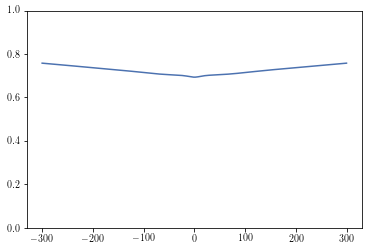

generating


100%|██████████| 100000/100000 [00:27<00:00, 3578.78it/s]


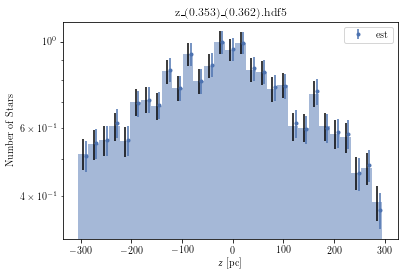

export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 

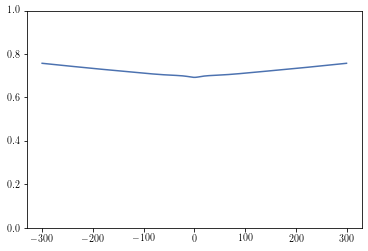

generating


100%|██████████| 100000/100000 [00:42<00:00, 2352.07it/s]


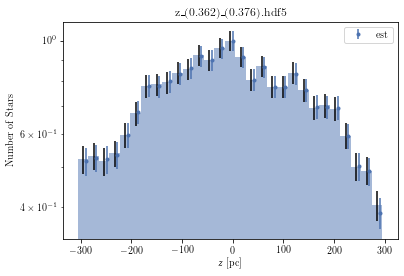

export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
 

In [43]:
from scipy.interpolate import interp1d
from scipy.special import gamma
from scipy.stats import norm
from scipy.optimize import curve_fit

def p_approx(x, n):
    if n > 100:
        return norm.pdf(x, loc=n, scale=np.sqrt(n))
    return np.power(x, n)*np.exp(-x)/gamma(n+1)

for index, file in enumerate(spec_files):
    gaia = vaex.open(file)
    gaia = gaia[['parallax', 'e_parallax', 'GLAT']]
    gaia = gaia.dropna()
    df_comp = vaex.open(comp_files[index])
    z = df_comp['z'].to_numpy()
    frac = df_comp['frac'].to_numpy()
    plt.plot(z, frac)
    plt.ylim(0,1)
    plt.show()
    # continue
    p = gaia['parallax'].to_numpy()/1000
    p_err = gaia['e_parallax'].to_numpy()/1000
    b = gaia['GLAT'].to_numpy()
    n = 100_000
    z_arr = vertical.generate_z(p, p_err, b, n=n)
    
    compz = interp1d(z, frac, fill_value='extrapolate', bounds_error=False, kind="cubic")
    zb = np.max(z)
    zmax = np.max(z_arr)
    zmin = np.min(z_arr)
    zl = np.floor(np.maximum(zmin, -zb))
    zu = np.ceil(np.minimum(zmax, zb))
    zedge = np.linspace(zl, zu, 30)

    gaia = vaex.open(spec_files[index])
    zs = gaia['z'].to_numpy()
    znum, _ = np.histogram(zs, bins=zedge)
    zmid = (zedge[1:] + zedge[:-1])/2
    comp = compz(zmid)
    mask = (comp > 0)*(znum > 0)
    znum = znum[mask]
    zmid = zmid[mask]
    M = z_arr.shape[0]
    znum_est = np.empty((M, len(znum)), dtype=int)
    print("generating")
    for i in tqdm(range(M)):
        z_realization = z_arr[i]
        znum_est_i = np.histogram(z_realization, bins=zedge)[0]
        znum_est[i] = znum_est_i[mask]
    z_est = np.empty_like(znum, dtype=float)
    z_comp = np.empty_like(znum, dtype=float)
    for i in range(len(zmid)):
        nz_min = np.floor(znum_est[:, i].min())
        nz_max = np.ceil(znum_est[:, i].max())
        bins = np.arange(nz_min-1/2, nz_max+1)
        zweight, n_edge = np.histogram(znum_est[:, i], bins=bins, density=True)
        ns = (n_edge[1:] + n_edge[:-1]) / 2
        mask = zweight > 0
        zweight = zweight[mask]
        ns = ns[mask]
        m = 5
        comp = compz(zmid[i])
        lambdas = np.linspace(np.maximum(0, znum[i]-m*np.sqrt(znum[i])), znum[i]+m*np.sqrt(znum[i]), 10_000)
        pn = np.sum(zweight[:, None]*poisson.pmf(ns[:,None], lambdas[None, :]), axis=0)
        area = np.trapz(pn, lambdas)
        pn = pn / area
        popt_g, _ = curve_fit(p_approx, lambdas, pn, p0=[znum[i]])
        z_est[i] = popt_g[0]
        z_comp[i] = comp
    dz = np.min(np.diff(zedge))
    name = file.split("/")[-1].replace("gaia", "z")
    plt.bar(zmid-5, znum/znum.max(), yerr=np.sqrt(znum)/znum.max(), width=dz, alpha=0.5)
    plt.errorbar(zmid, z_est/z_est.max(), yerr=np.sqrt(z_est)/z_est.max(), fmt='.', label="est")
    plt.xlabel(r"$z$ [pc]")
    plt.ylabel("Number of Stars")
    plt.legend()
    plt.title(name)
    plt.yscale('log')
    plt.show()
    df = vaex.from_arrays(mid=zmid, num=z_est, com=z_comp)
    df.export(join(data_dir, name), progress=True)
    # break
# df